## DATA MINING PROJECT:

## Environmental Sector

### Checking Stationary or Not :

In [1]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from sklearn.preprocessing import MinMaxScaler
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

c:\Users\sharjeel\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
data=pd.read_csv("full_data.csv")
data

,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,01:01:2018:00:00,27412.81,27412.81,6926.78,4820.40,5226.32,1900.32,5314.05,1179.51,0.0,...,278.20,189.50,210.96,0.0,0.0,297.00,92.08,207.60,55.04,45.97
1,01:01:2018:01:00,26324.39,26324.39,6603.44,3644.32,5277.19,1877.83,5715.61,1148.46,0.0,...,284.82,205.50,211.67,0.0,0.0,287.00,91.14,205.34,54.44,45.47
2,01:01:2018:02:00,24635.32,24635.32,6040.77,2711.00,5325.47,1708.49,5701.37,1216.38,0.0,...,278.20,201.50,209.89,0.0,0.0,169.00,91.06,164.94,43.73,36.53
3,01:01:2018:03:00,23872.12,23872.12,5938.46,2524.37,5265.91,1662.59,5205.43,1298.11,0.0,...,271.57,211.50,211.24,0.0,0.0,214.00,91.83,154.52,40.97,34.22
4,01:01:2018:04:00,23194.89,23194.89,5665.41,2462.71,5282.88,1697.96,4804.19,1220.91,0.0,...,273.78,307.50,214.31,0.0,0.0,203.00,91.23,112.64,29.86,24.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,31:12:2023:19:00,35090.93,34753.40,5567.82,8719.86,5311.18,2287.36,9100.92,359.70,0.0,...,130.27,613.05,997.70,0.0,0.0,270.20,82.49,2499.67,84.91,76.74
52580,31:12:2023:20:00,33310.94,31441.31,4792.96,7881.64,4908.48,2083.33,7613.93,459.87,0.0,...,132.48,612.95,983.26,0.0,0.0,539.84,85.01,2472.34,83.98,75.90
52581,31:12:2023:21:00,32083.96,30368.98,4000.94,7513.96,4911.94,1966.32,7656.56,552.62,0.0,...,132.48,607.59,977.02,0.0,0.0,629.91,84.63,2472.33,83.98,75.90
52582,31:12:2023:22:00,30469.49,30386.41,2903.52,8119.63,4615.93,1837.75,8390.47,720.11,0.0,...,130.27,608.31,987.47,0.0,0.0,627.77,83.35,1800.00,61.15,55.26


### ADF Test:

In [3]:
data['time'] = pd.to_datetime(data['time'], format='%d:%m:%Y:%H:%M')


timeseries = data['total_generation_MWh']

# Perform the ADF test
result = adfuller(timeseries)

print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(f'{key}: {value}')

ADF Statistic: -14.359188155120224
p-value: 9.915020049480314e-27
Critical Values:
1%: -3.4304745025245373
5%: -2.861595027617222
10%: -2.5667992893705645


In [4]:



# Stationarization
# We'll apply differencing to achieve stationarity

# Perform the ADF test on the differenced data


## Pre-processing:

In [5]:
data['time'] = pd.to_datetime(data['time'], format='%d:%m:%Y:%H:%M')
missing_values = data.isnull().sum()
print("Missing Values:\n", missing_values)
data

Missing Values:
 time                    0
consumption_MWh         0
total_generation_MWh    0
natural_gas             0
hydro_dam               0
lignite                 0
hydro_river             0
coal_imported           0
wind                    0
solar                   0
fuel_oil                0
geothermal              0
asphaltite_coal         0
hard_coal               0
biomass                 0
naphtha                 0
LNG                     0
international           0
waste_heat              0
TRY/MWh                 0
USD/MWh                 0
EUR/MWh                 0
dtype: int64


,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,2018-01-01 00:00:00,27412.81,27412.81,6926.78,4820.40,5226.32,1900.32,5314.05,1179.51,0.0,...,278.20,189.50,210.96,0.0,0.0,297.00,92.08,207.60,55.04,45.97
1,2018-01-01 01:00:00,26324.39,26324.39,6603.44,3644.32,5277.19,1877.83,5715.61,1148.46,0.0,...,284.82,205.50,211.67,0.0,0.0,287.00,91.14,205.34,54.44,45.47
2,2018-01-01 02:00:00,24635.32,24635.32,6040.77,2711.00,5325.47,1708.49,5701.37,1216.38,0.0,...,278.20,201.50,209.89,0.0,0.0,169.00,91.06,164.94,43.73,36.53
3,2018-01-01 03:00:00,23872.12,23872.12,5938.46,2524.37,5265.91,1662.59,5205.43,1298.11,0.0,...,271.57,211.50,211.24,0.0,0.0,214.00,91.83,154.52,40.97,34.22
4,2018-01-01 04:00:00,23194.89,23194.89,5665.41,2462.71,5282.88,1697.96,4804.19,1220.91,0.0,...,273.78,307.50,214.31,0.0,0.0,203.00,91.23,112.64,29.86,24.95
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,35090.93,34753.40,5567.82,8719.86,5311.18,2287.36,9100.92,359.70,0.0,...,130.27,613.05,997.70,0.0,0.0,270.20,82.49,2499.67,84.91,76.74
52580,2023-12-31 20:00:00,33310.94,31441.31,4792.96,7881.64,4908.48,2083.33,7613.93,459.87,0.0,...,132.48,612.95,983.26,0.0,0.0,539.84,85.01,2472.34,83.98,75.90
52581,2023-12-31 21:00:00,32083.96,30368.98,4000.94,7513.96,4911.94,1966.32,7656.56,552.62,0.0,...,132.48,607.59,977.02,0.0,0.0,629.91,84.63,2472.33,83.98,75.90
52582,2023-12-31 22:00:00,30469.49,30386.41,2903.52,8119.63,4615.93,1837.75,8390.47,720.11,0.0,...,130.27,608.31,987.47,0.0,0.0,627.77,83.35,1800.00,61.15,55.26


In [6]:
numerical_columns = data.select_dtypes(include=[np.number]).columns.tolist()
data[numerical_columns] = (data[numerical_columns] - data[numerical_columns].mean()) / data[numerical_columns].std()
data

,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,2018-01-01 00:00:00,-1.349984,-1.325151,-0.446664,-0.278875,0.527059,-0.239163,-0.994933,-1.024691,-0.49276,...,0.510848,-1.954382,-1.510023,NaN,-0.10794,0.676755,0.756723,-0.700156,-0.344277,-0.401023
1,2018-01-01 01:00:00,-1.539478,-1.531597,-0.526956,-0.691990,0.609629,-0.256024,-0.774776,-1.040939,-0.49276,...,0.590765,-1.815821,-1.507196,NaN,-0.10794,0.649025,0.687966,-0.702163,-0.356321,-0.411138
2,2018-01-01 02:00:00,-1.833544,-1.851971,-0.666680,-1.019832,0.687995,-0.382986,-0.782583,-1.005397,-0.49276,...,0.510848,-1.850461,-1.514283,NaN,-0.10794,0.321802,0.682114,-0.738034,-0.571316,-0.591993
3,2018-01-01 03:00:00,-1.966417,-1.996731,-0.692085,-1.085388,0.591320,-0.417400,-1.054484,-0.962628,-0.49276,...,0.430810,-1.763860,-1.508908,NaN,-0.10794,0.446590,0.738437,-0.747286,-0.626721,-0.638725
4,2018-01-01 04:00:00,-2.084323,-2.125184,-0.759890,-1.107047,0.618865,-0.390881,-1.274466,-1.003026,-0.49276,...,0.457489,-0.932494,-1.496685,NaN,-0.10794,0.416086,0.694549,-0.784472,-0.849746,-0.826256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,-0.013225,0.067175,-0.784124,1.090867,0.664800,0.051019,1.081235,-1.453697,-0.49276,...,-1.274972,1.713590,1.622417,NaN,-0.10794,0.602437,0.055248,1.335008,0.255340,0.221453
52580,2023-12-31 20:00:00,-0.323121,-0.561046,-0.976539,0.796430,0.011156,-0.101952,0.265987,-1.401278,-0.49276,...,-1.248292,1.712724,1.564924,NaN,-0.10794,1.350169,0.239577,1.310742,0.236671,0.204460
52581,2023-12-31 21:00:00,-0.536738,-0.764440,-1.173215,0.667277,0.016772,-0.189679,0.289359,-1.352742,-0.49276,...,-1.248292,1.666306,1.540079,NaN,-0.10794,1.599940,0.211782,1.310733,0.236671,0.204460
52582,2023-12-31 22:00:00,-0.817817,-0.761134,-1.445729,0.880027,-0.463698,-0.286074,0.691728,-1.265094,-0.49276,...,-1.274972,1.672541,1.581686,NaN,-0.10794,1.594005,0.118154,0.713761,-0.221624,-0.213087


### Cleaning:

In [7]:
data.fillna(method='ffill', inplace=True)
data

,time,consumption_MWh,total_generation_MWh,natural_gas,hydro_dam,lignite,hydro_river,coal_imported,wind,solar,...,asphaltite_coal,hard_coal,biomass,naphtha,LNG,international,waste_heat,TRY/MWh,USD/MWh,EUR/MWh
0,2018-01-01 00:00:00,-1.349984,-1.325151,-0.446664,-0.278875,0.527059,-0.239163,-0.994933,-1.024691,-0.49276,...,0.510848,-1.954382,-1.510023,NaN,-0.10794,0.676755,0.756723,-0.700156,-0.344277,-0.401023
1,2018-01-01 01:00:00,-1.539478,-1.531597,-0.526956,-0.691990,0.609629,-0.256024,-0.774776,-1.040939,-0.49276,...,0.590765,-1.815821,-1.507196,NaN,-0.10794,0.649025,0.687966,-0.702163,-0.356321,-0.411138
2,2018-01-01 02:00:00,-1.833544,-1.851971,-0.666680,-1.019832,0.687995,-0.382986,-0.782583,-1.005397,-0.49276,...,0.510848,-1.850461,-1.514283,NaN,-0.10794,0.321802,0.682114,-0.738034,-0.571316,-0.591993
3,2018-01-01 03:00:00,-1.966417,-1.996731,-0.692085,-1.085388,0.591320,-0.417400,-1.054484,-0.962628,-0.49276,...,0.430810,-1.763860,-1.508908,NaN,-0.10794,0.446590,0.738437,-0.747286,-0.626721,-0.638725
4,2018-01-01 04:00:00,-2.084323,-2.125184,-0.759890,-1.107047,0.618865,-0.390881,-1.274466,-1.003026,-0.49276,...,0.457489,-0.932494,-1.496685,NaN,-0.10794,0.416086,0.694549,-0.784472,-0.849746,-0.826256
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52579,2023-12-31 19:00:00,-0.013225,0.067175,-0.784124,1.090867,0.664800,0.051019,1.081235,-1.453697,-0.49276,...,-1.274972,1.713590,1.622417,NaN,-0.10794,0.602437,0.055248,1.335008,0.255340,0.221453
52580,2023-12-31 20:00:00,-0.323121,-0.561046,-0.976539,0.796430,0.011156,-0.101952,0.265987,-1.401278,-0.49276,...,-1.248292,1.712724,1.564924,NaN,-0.10794,1.350169,0.239577,1.310742,0.236671,0.204460
52581,2023-12-31 21:00:00,-0.536738,-0.764440,-1.173215,0.667277,0.016772,-0.189679,0.289359,-1.352742,-0.49276,...,-1.248292,1.666306,1.540079,NaN,-0.10794,1.599940,0.211782,1.310733,0.236671,0.204460
52582,2023-12-31 22:00:00,-0.817817,-0.761134,-1.445729,0.880027,-0.463698,-0.286074,0.691728,-1.265094,-0.49276,...,-1.274972,1.672541,1.581686,NaN,-0.10794,1.594005,0.118154,0.713761,-0.221624,-0.213087


### Normalization:

### Stationarization:

In [8]:
data['total_generation_MWh_diff'] = data['total_generation_MWh'].diff()

data['total_generation_MWh_log'] = np.log1p(data['total_generation_MWh'])

c:\Users\sharjeel\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [9]:
adf_result_diff = adfuller(data['total_generation_MWh_diff'].dropna())
print('ADF Statistic (Differenced Data):', adf_result_diff[0])
print('p-value (Differenced Data):', adf_result_diff[1])

# Perform the ADF test on the log-transformed data
adf_result_log = adfuller(data['total_generation_MWh_log'].dropna())
print('ADF Statistic (Log-Transformed Data):', adf_result_log[0])
print('p-value (Log-Transformed Data):', adf_result_log[1])

ADF Statistic (Differenced Data): -37.11792891774303
p-value (Differenced Data): 0.0
ADF Statistic (Log-Transformed Data): -14.838533314505597
p-value (Log-Transformed Data): 1.852332501694827e-27


In [10]:
data.to_csv('final_processed_data.csv', index=False)

## Model Development :

### ARIMA:

### Check Stationary :

c:\Users\sharjeel\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


ADF Statistic (Differenced Data): -37.11792891774274
p-value (Differenced Data): 0.0
ADF Statistic (Log-Transformed Data): -14.8385333145051
p-value (Log-Transformed Data): 1.852332501697893e-27


c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


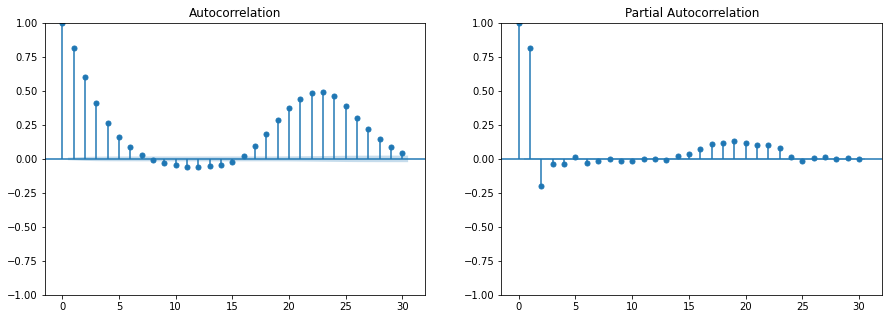

c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


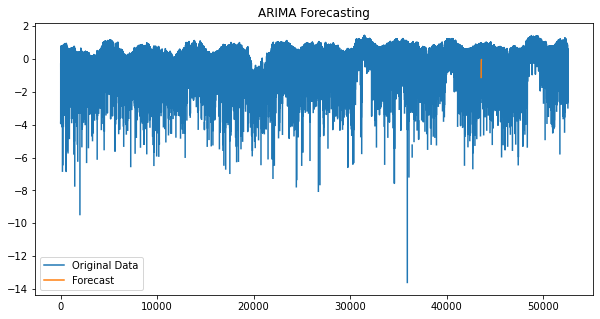

In [11]:
data=pd.read_csv('final_processed_data.csv')
data['total_generation_MWh_diff'] = data['total_generation_MWh'].diff()

data['total_generation_MWh_log'] = np.log1p(data['total_generation_MWh'])

adf_result_diff = adfuller(data['total_generation_MWh_diff'].dropna())
print('ADF Statistic (Differenced Data):', adf_result_diff[0])
print('p-value (Differenced Data):', adf_result_diff[1])

# Perform the ADF test on the log-transformed data
adf_result_log = adfuller(data['total_generation_MWh_log'].dropna())
print('ADF Statistic (Log-Transformed Data):', adf_result_log[0])
print('p-value (Log-Transformed Data):', adf_result_log[1])

fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data['total_generation_MWh_log'].dropna(), lags=30, ax=axes[0])
plot_pacf(data['total_generation_MWh_log'].dropna(), lags=30, ax=axes[1])
plt.show()



p, d, q = 1, 0, 1 
arima_model = ARIMA(data['total_generation_MWh_log'].dropna(), order=(p, d, q))
arima_result = arima_model.fit()

# Step 4: Forecasting
forecast_steps = 24  
forecast = arima_result.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data['total_generation_MWh_log'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()


### Identify Parameters:

c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


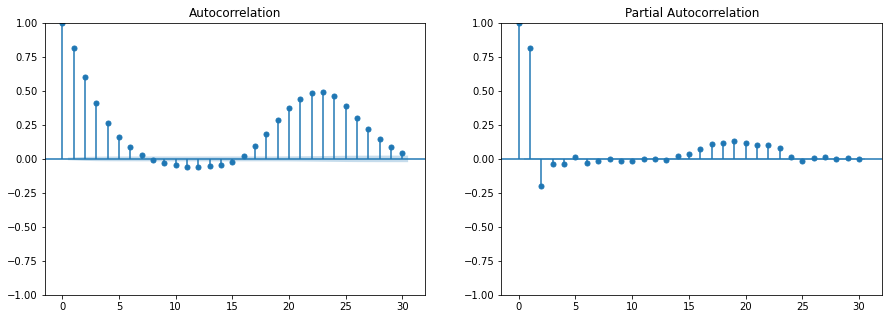

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
plot_acf(data['total_generation_MWh_log'].dropna(), lags=30, ax=axes[0])
plot_pacf(data['total_generation_MWh_log'].dropna(), lags=30, ax=axes[1])
plt.show()



### Spliting Dataset:

c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


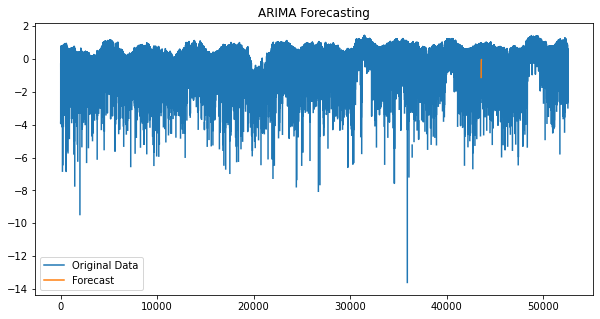

In [13]:

p, d, q = 1, 0, 1 
arima_model = ARIMA(data['total_generation_MWh_log'].dropna(), order=(p, d, q))
arima_result = arima_model.fit()

# Step 4: Forecasting
forecast_steps = 24  
forecast = arima_result.forecast(steps=forecast_steps)

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(data['total_generation_MWh_log'], label='Original Data')
plt.plot(forecast, label='Forecast')
plt.title('ARIMA Forecasting')
plt.legend()
plt.show()

In [14]:
data=pd.read_csv("final_processed_data.csv")

### Validating:

c:\Users\sharjeel\anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning

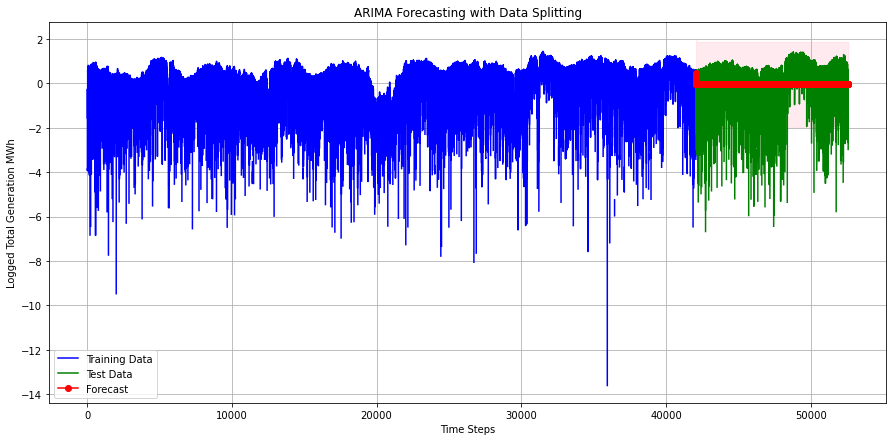

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import adfuller

# Assuming 'data' is your DataFrame and it has been loaded correctly
data['total_generation_MWh_diff'] = data['total_generation_MWh'].diff()
data['total_generation_MWh_log'] = np.log1p(data['total_generation_MWh'])

# Split data into train and test
split_ratio = 0.8
split_index = int(len(data) * split_ratio)
train_data = data['total_generation_MWh_log'][:split_index]
test_data = data['total_generation_MWh_log'][split_index:]

# Fit the ARIMA model on the training dataset
p, d, q = 1, 0, 1
arima_model = ARIMA(train_data.dropna(), order=(p, d, q))
arima_result = arima_model.fit()

# Forecasting beyond the training data into the test data
forecast_steps = len(test_data)
forecast = arima_result.get_forecast(steps=forecast_steps)
forecast_index = np.arange(len(train_data), len(train_data) + forecast_steps)

# Plotting the results with clear distinctions for training, testing, and forecast
plt.figure(figsize=(15, 7))
plt.plot(train_data, label='Training Data', color='blue')
plt.plot(test_data.index, test_data, label='Test Data', color='green')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red', marker='o')
conf_int = forecast.conf_int()
plt.fill_between(forecast_index, conf_int.iloc[:, 0], conf_int.iloc[:, 1], color='pink', alpha=0.3)
plt.title('ARIMA Forecasting with Data Splitting')
plt.xlabel('Time Steps')
plt.ylabel('Logged Total Generation MWh')
plt.legend()
plt.grid(True)
plt.show()


Red shade wala part is predicted wala part

ANN

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras

# Load the data
data = pd.read_csv('final_processed_data.csv')

# Convert 'time' column to datetime and extract components
data['time'] = pd.to_datetime(data['time'])
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month
data['day'] = data['time'].dt.day
data['hour'] = data['time'].dt.hour

# Optionally drop the original 'time' column if it's no longer needed
data.drop('time', axis=1, inplace=True)

# Assuming you want to predict 'consumption_MWh' as the target
X = data.drop('consumption_MWh', axis=1)  # Features without the target
y = data['consumption_MWh']   # Target

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Create a Neural Network model
model = keras.Sequential([
    keras.layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)  # Output layer with 1 neuron since it's regression
])

# Compile the model
model.compile(optimizer='adam',
              loss='mean_squared_error',  # Using MSE for a regression problem
              metrics=['mae'])  # Tracking Mean Absolute Error for interpretability

# Train the model
history = model.fit(X_train_scaled, y_train, epochs=10, validation_split=0.1)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test)
print(f'Test MAE: {test_mae}')


c:\Users\sharjeel\anaconda3\lib\site-packages\sklearn\utils\extmath.py:985: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\sharjeel\anaconda3\lib\site-packages\sklearn\utils\extmath.py:990: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\sharjeel\anaconda3\lib\site-packages\sklearn\utils\extmath.py:1020: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction ** 2 / new_sample_count
c:\Users\sharjeel\anaconda3\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - loss: 1.0164 - mae: 0.8251 - val_loss: 0.9780 - val_mae: 0.8090
Epoch 2/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9927 - mae: 0.8147 - val_loss: 0.9780 - val_mae: 0.8091
Epoch 3/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0049 - mae: 0.8196 - val_loss: 0.9779 - val_mae: 0.8090
Epoch 4/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0027 - mae: 0.8192 - val_loss: 0.9779 - val_mae: 0.8090
Epoch 5/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9954 - mae: 0.8175 - val_loss: 0.9779 - val_mae: 0.8090
Epoch 6/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0003 - mae: 0.8206 - val_loss: 0.9780 - val_mae: 0.8090
Epoch 7/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 1.0050 - mae: 0.8221 - val_loss: 0.9780 - val_mae: 0.8090
Epoch 8/10
1184/1184 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 0.9909 - mae: 0.8144 - val_loss: 0.9780 - val_mae: 0.8090
Epoch 9/10
1184/1184 ━━━━━━━━━━━━━━━━━━━

Graphical Representation of ANN

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

# Load data
data = pd.read_csv('final_processed_data.csv')
total_generation_MWh = data['total_generation_MWh'].values

# Define time_steps and split_index
time_steps = 10  # Number of timesteps per sequence
split_index = int(0.8 * len(total_generation_MWh))  # 80% for training

# Helper function to create sequences
def create_sequences(data, steps):
    X, y = [], []
    for i in range(len(data) - steps):
        X.append(data[i:(i + steps)])
        y.append(data[i + steps])
    return np.array(X), np.array(y)

# Prepare data
X, y = create_sequences(total_generation_MWh, time_steps)
X_train, y_train = X[:split_index], y[:split_index]
X_test, y_test = X[split_index:], y[split_index:]

# Reshape for LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test = X_test.reshape((X_test.shape[0], X_test.shape[1], 1))

# Build and train LSTM model
model = Sequential([
    LSTM(50, activation='relu', input_shape=(time_steps, 1)),
    Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32, verbose=1)
 
 
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)



predicted_train = train_predict.flatten()
predicted_test = test_predict.flatten()

actual_train = data['total_generation_MWh'][time_steps:split_index]
actual_test = data['total_generation_MWh'][split_index+time_steps:]

actual_train.index = range(len(actual_train))
actual_test.index = range(len(actual_test))


Epoch 1/10


c:\Users\sharjeel\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1315/1315 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - loss: 0.1599
Epoch 2/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0273
Epoch 3/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - loss: 0.0257
Epoch 4/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - loss: 0.0251
Epoch 5/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0232
Epoch 6/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - loss: 0.0212
Epoch 7/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0200
Epoch 8/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0177
Epoch 9/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0160
Epoch 10/10
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - loss: 0.0151
1315/1315 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
329/329 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


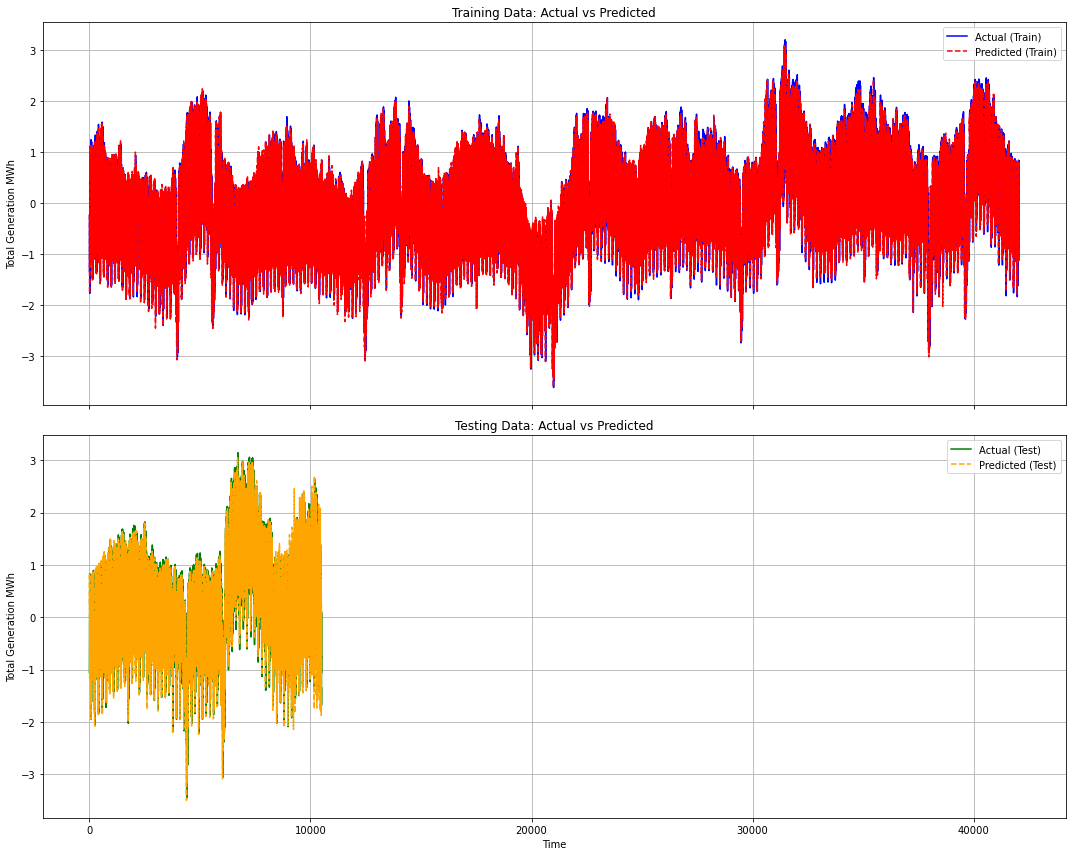

In [18]:
# Assuming time_steps is 10
# Trim predictions to match actual values' indices
predicted_train_trimmed = predicted_train[time_steps:]
predicted_test_trimmed = predicted_test[time_steps:]

# Ensure proper indexing for plotting by resetting index on actual values
actual_train = actual_train.reset_index(drop=True)
actual_test = actual_test.reset_index(drop=True)

# Plotting code
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 12), sharex=True)

# Training data plot
ax1.plot(actual_train, label='Actual (Train)', color='blue')
ax1.plot(predicted_train_trimmed, label='Predicted (Train)', color='red', linestyle='--')
ax1.set_title('Training Data: Actual vs Predicted')
ax1.set_ylabel('Total Generation MWh')
ax1.legend()
ax1.grid(True)

# Testing data plot
ax2.plot(actual_test, label='Actual (Test)', color='green')
ax2.plot(predicted_test_trimmed, label='Predicted (Test)', color='orange', linestyle='--')
ax2.set_title('Testing Data: Actual vs Predicted')
ax2.set_xlabel('Time')
ax2.set_ylabel('Total Generation MWh')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


## SARIMA MODEL :

In [19]:
p, q, P, Q = 1, 1, 1, 1
s = 12              # months
D = 1

In [20]:
model = SARIMAX(data['total_generation_MWh'], order=(p, 1, q), seasonal_order=(P, D, Q, s))
results = model.fit(disp=False)


In [21]:
forecast_steps = 24  # Extending forecast to 2 years for monthly data
forecast = results.forecast(steps=forecast_steps)


## Plotting:

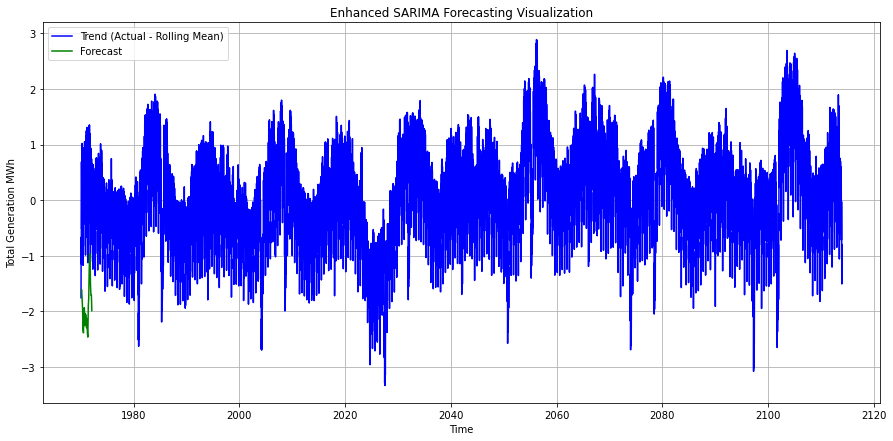

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract the last date in your dataset to start the forecasted period
last_date = data.index[-1]

# Generate a date range for the forecasted period starting from the next month after the last date in the dataset
forecast_dates = pd.date_range(start=last_date, periods=forecast_steps+1, freq='M')[1:]

# Plotting with the correct x-axis range
plt.figure(figsize=(15, 7))
plt.plot(data.index, data['total_generation_MWh'].rolling(window=12).mean(), label='Trend (Actual - Rolling Mean)', color='blue')
plt.plot(forecast_dates, forecast, label='Forecast', color='green')
plt.title('Enhanced SARIMA Forecasting Visualization')
plt.xlabel('Time')
plt.ylabel('Total Generation MWh')
plt.legend()
plt.grid(True)
plt.show()


## ETS

Model Training

In [35]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the preprocessed data
final_preprocessed_data = pd.read_csv('final_processed_data.csv')


final_preprocessed_data['time'] = pd.to_datetime(final_preprocessed_data['time'])
final_preprocessed_data.set_index('time', inplace=True)


train_size = int(len(final_preprocessed_data) * 0.8)
train_data = final_preprocessed_data.iloc[:train_size]
test_data = final_preprocessed_data.iloc[train_size:]


model = ExponentialSmoothing(train_data['total_generation_MWh'], seasonal_periods=24, trend='add', seasonal='add')
fitted_model = model.fit()


forecast = fitted_model.forecast(steps=len(test_data))


forecast = pd.Series(forecast, index=test_data.index)


def calculate_metrics(actual, predicted):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    mape = mean_absolute_percentage_error(actual, predicted) * 100
    r2 = r2_score(actual, predicted)
    return mae, rmse, mape, r2

# Calculate accuracy metrics
mae, rmse, mape, r2 = calculate_metrics(test_data['total_generation_MWh'], forecast)

# Print accuracy metrics
print(f'Exponential Smoothing - MAE: {mae}, RMSE: {rmse}, MAPE: {mape}, R2: {r2}')


print(forecast)


c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)


Exponential Smoothing - MAE: 0.6117353776299551, RMSE: 0.8245088338602661, MAPE: 224.81014355738193, R2: 0.3421543075879767
time
2022-10-19 19:00:00    0.824040
2022-10-19 20:00:00    0.719189
2022-10-19 21:00:00    0.571558
2022-10-19 22:00:00    0.385252
2022-10-19 23:00:00    0.117511
                         ...   
2023-12-31 19:00:00    1.058212
2023-12-31 20:00:00    0.953361
2023-12-31 21:00:00    0.805731
2023-12-31 22:00:00    0.619425
2023-12-31 23:00:00    0.351683
Length: 10517, dtype: float64


Graphical Representation

C:\Users\sharjeel\AppData\Local\Temp\ipykernel_16564\204744867.py:10: FutureWarning: Argument `closed` is deprecated in favor of `inclusive`.
  forecast_index = pd.date_range(start=final_preprocessed_data.index[-1], periods=24, closed='right', freq='H')


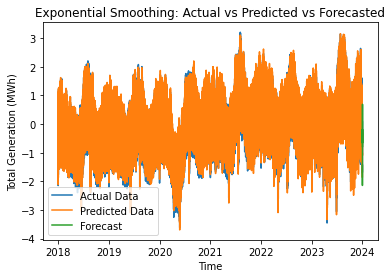

In [24]:
import matplotlib.pyplot as plt

# Plot actual data
plt.plot(final_preprocessed_data.index, final_preprocessed_data['total_generation_MWh'], label='Actual Data')

# Plot predicted data
plt.plot(final_preprocessed_data.index, fitted_model.fittedvalues, label='Predicted Data')

# Plot forecasted line
forecast_index = pd.date_range(start=final_preprocessed_data.index[-1], periods=24, closed='right', freq='H')
forecast = forecast[:len(forecast_index)]  # Adjust forecast length to match forecast_index
plt.plot(forecast_index, forecast, label='Forecast')

plt.xlabel('Time')
plt.ylabel('Total Generation (MWh)')
plt.title('Exponential Smoothing: Actual vs Predicted vs Forecasted')
plt.legend()
plt.show()


## Long Short-Term Memory (LSTM)

In [25]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam


np.random.seed(0)
values = np.random.randn(1000)  
data = pd.DataFrame(values, columns=['feature'])


def create_sequences(data, n_steps):
    X, y = [], []
    for i in range(len(data)):
        end_ix = i + n_steps
        if end_ix > len(data)-1:
            break
        seq_x, seq_y = data[i:end_ix], data[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

# Parameters
n_steps = 10  # Number of time steps in each sequence
n_features = 1  # Number of features per step

# Prepare input data for LSTM
X, y = create_sequences(data['feature'].values, n_steps)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Reshape data for LSTM [samples, time_steps, features]
X_train = X_train.reshape((X_train.shape[0], n_steps, n_features))
X_test = X_test.reshape((X_test.shape[0], n_steps, n_features))

# Define model architecture
model = Sequential([
    LSTM(units=50, input_shape=(n_steps, n_features)),  # LSTM layer
    Dense(units=1)  # Output layer
])

# Compile the model
model.compile(loss='mean_squared_error', optimizer=Adam(), metrics=['mae'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.1)

# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

# Optionally, make predictions
# predictions = model.predict(X_test)


c:\Users\sharjeel\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 2s 17ms/step - loss: 0.9624 - mae: 0.7829 - val_loss: 1.0891 - val_mae: 0.8132
Epoch 2/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0155 - mae: 0.8072 - val_loss: 1.1002 - val_mae: 0.8178
Epoch 3/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0206 - mae: 0.8053 - val_loss: 1.1102 - val_mae: 0.8202
Epoch 4/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9886 - mae: 0.7902 - val_loss: 1.1212 - val_mae: 0.8273
Epoch 5/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9352 - mae: 0.7676 - val_loss: 1.1205 - val_mae: 0.8253
Epoch 6/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9514 - mae: 0.7766 - val_loss: 1.1180 - val_mae: 0.8215
Epoch 7/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9353 - mae: 0.7757 - val_loss: 1.1176 - val_mae: 0.8222
Epoch 8/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.9148 - mae: 0.7750 - val_loss: 1.1253 - val_mae: 0.8236
Epoch 9/20
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.9458 - mae:

Graphical Repersentation

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


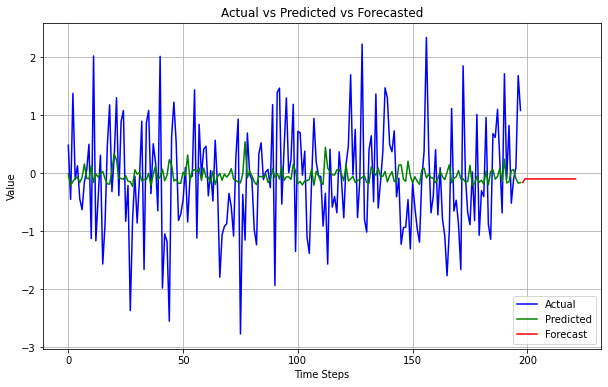

In [26]:
# Make predictions
predictions = model.predict(X_test)

# Plot actual, predicted, and forecasted values
plt.figure(figsize=(10, 6))
plt.plot(y_test, label='Actual', color='blue')  # Actual values
plt.plot(predictions, label='Predicted', color='green')  # Predicted values
# Plot forecasted values for the next 'forecast_steps' steps
forecast_steps = 24  # Change as needed
forecast_index = range(len(y_test), len(y_test) + forecast_steps)
forecast = model.predict(X_test[-1].reshape(1, n_steps, n_features))  # Forecast the next step
for i in range(forecast_steps - 1):
    forecast = np.append(forecast, model.predict(np.append(X_test[-1][1:], forecast[-1]).reshape(1, n_steps, n_features)))
plt.plot(forecast_index, forecast, label='Forecast', color='red')  # Forecasted values
plt.title('Actual vs Predicted vs Forecasted')
plt.xlabel('Time Steps')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()


Hybrid 

c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
c:\Users\sharjeel\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency H will be used.
  self._init_dates(dates, freq)
C:\Users\sharjeel\AppData\Local\Temp\ipykernel_16564\3666666600.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data['res

Train RMSE: 2.6411
Test RMSE: 1.3624


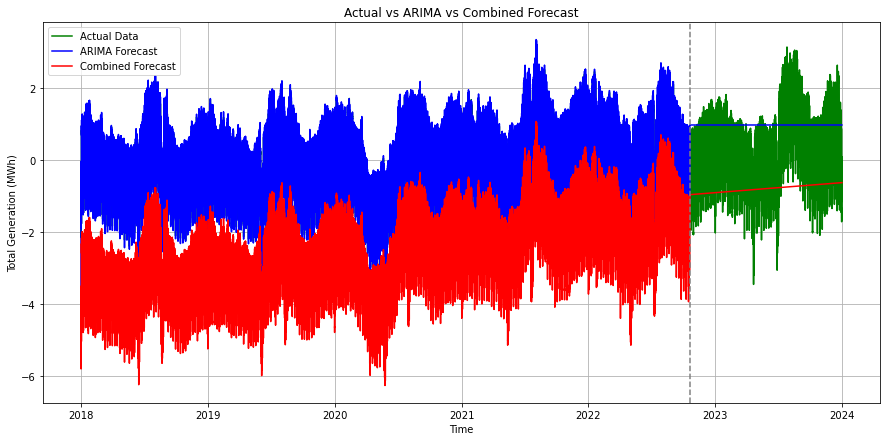

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error


data = pd.read_csv('final_processed_data.csv', parse_dates=['time'])
data.set_index('time', inplace=True)

data.dropna(axis=1, how='all', inplace=True)


data.fillna(data.mean(), inplace=True)


scaler = MinMaxScaler()
data['total_generation_MWh_scaled'] = scaler.fit_transform(data[['total_generation_MWh']])


train_size = int(len(data) * 0.8)
train_data = data.iloc[:train_size]
test_data = data.iloc[train_size:]


arima_order = (5, 1, 0) 
arima_model = ARIMA(train_data['total_generation_MWh_scaled'], order=arima_order)
arima_fit = arima_model.fit()


arima_forecast = arima_fit.forecast(steps=len(test_data))
arima_forecast = np.concatenate([arima_fit.fittedvalues, arima_forecast])
arima_forecast = scaler.inverse_transform(arima_forecast.reshape(-1, 1)).flatten()


train_data['residuals'] = train_data['total_generation_MWh_scaled'] - arima_fit.fittedvalues


X_train = np.arange(len(train_data)).reshape(-1, 1)
y_train = train_data['residuals']

ann_model = MLPRegressor(hidden_layer_sizes=(50,), max_iter=500, random_state=42)
ann_model.fit(X_train, y_train)


X_test = np.arange(len(train_data), len(train_data) + len(test_data)).reshape(-1, 1)
ann_forecast = ann_model.predict(np.concatenate([X_train, X_test]))
ann_forecast = scaler.inverse_transform(ann_forecast.reshape(-1, 1)).flatten()


combined_forecast = arima_forecast + ann_forecast


train_rmse = np.sqrt(mean_squared_error(data['total_generation_MWh'][:train_size], combined_forecast[:train_size]))
test_rmse = np.sqrt(mean_squared_error(data['total_generation_MWh'][train_size:], combined_forecast[train_size:]))
print(f'Train RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')


plt.figure(figsize=(15, 7))
plt.plot(data.index, data['total_generation_MWh'], label='Actual Data', color='green')
plt.plot(data.index, arima_forecast, label='ARIMA Forecast', color='blue')
plt.plot(data.index, combined_forecast, label='Combined Forecast', color='red')
plt.axvline(x=data.index[train_size], color='gray', linestyle='--')
plt.xlabel('Time')
plt.ylabel('Total Generation (MWh)')
plt.title('Actual vs ARIMA vs Combined Forecast')
plt.legend()
plt.grid(True)
plt.show()

Accuracies Of All Models

## PROPHET MODEL :

In [1]:
%pip install prophet


Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Program Files (x86)\Microsoft Visual Studio\Shared\Python39_64\python.exe -m pip install --upgrade pip' command.



     ---------------------------------------- 13.3/13.3 MB 3.7 MB/s eta 0:00:00
     ---------------------------------------- 1.0/1.0 MB 7.2 MB/s eta 0:00:00
     ---------------------------------------- 94.4/94.4 KB 5.6 MB/s eta 0:00:00


20:46:45 - cmdstanpy - INFO - Chain [1] start processing
20:48:09 - cmdstanpy - INFO - Chain [1] done processing
C:\Users\heart\AppData\Roaming\Python\Python39\site-packages\prophet\forecaster.py:1854: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


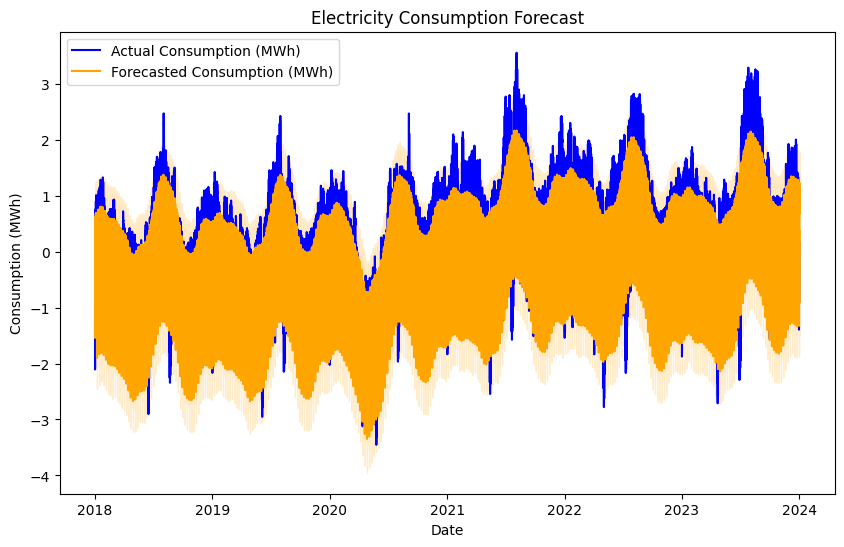

In [6]:

file_path = 'final_processed_data.csv'
df = pd.read_csv(file_path)

df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df = df.rename(columns={'time': 'ds', 'consumption_MWh': 'y'})

model = Prophet()
model.fit(df[['ds', 'y']])

future = model.make_future_dataframe(periods=24, freq='H')
forecast = model.predict(future)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(df['ds'], df['y'], label='Actual Consumption (MWh)', color='blue')
ax.plot(forecast['ds'], forecast['yhat'], label='Forecasted Consumption (MWh)', color='orange')

ax.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='orange', alpha=0.2)

plt.title('Electricity Consumption Forecast')
plt.xlabel('Date')
plt.ylabel('Consumption (MWh)')
plt.legend()

plt.show()


test_df = df[-24:]
forecast_test = forecast[-24:]
mae = mean_absolute_error(test_df['y'], forecast_test['yhat'])

